# 데이터 전처리 및 정제

In [1]:
#필요 패키지 로드
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2022-11-04 05:59:55.517271: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-04 05:59:55.521903: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/nvidia:/usr/lib/x86_64-linux-gnu:/usr/local/cuda/lib64
2022-11-04 05:59:55.521917: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#라벨링 된 최종 데이터셋 불러오기
df = pd.read_csv('data_8074.csv', encoding = 'utf-8')
df

,Unnamed: 0,icls_cnts,label
0,0,..<b>경찰</b>과 추격전까지 벌인 40대 남성이 붙잡혔습니다. .. 1시간이 ...,1.0
1,1,순창<b>경찰</b>서 사회적 약자 발굴·지원 앞장 .. 순창<b>경찰</b>서(서...,1.0
2,2,그 생김새가 미심쩍었던 부부는 일주일 넘게 고양이를 데리고 있다 <b>경찰</b>...,1.0
3,3,"수원남부署, 모범<b>경찰</b> 최보라·김세홍 경장에 표창·장려장 수원남부<b>경...",1.0
4,4,조두순에 대한 1대1 전자감독 및 <b>경찰</b>을 통한 24시간 밀착 감독 등...,1.0
...,...,...,...
8069,970,김주원 음성경찰서 설성지구대장(왼쪽)이 전화금융사기를 예방한 음성농협 원남지점 서아...,0.0
8070,971,..경찰청◎총경 승진 예정△서울 광역수사 광역1 박종환△광주 형사 강력 송기주△전남...,0.0
8071,972,"대구경찰청, 2021년 설 명절 종합치안활동 추진 대구경찰청이 오는 14일까지 20...",0.0
8072,973,..경찰청에 따르면 경찰은 지난달 30일 오후 9시 30분쯤 부산 중구 한 상점에서...,0.0


In [3]:
#필요한 컬럼만 추출하기 (뉴스 기사 본문('icls_cnts'), 레이블('label'))
df = df[['icls_cnts','label']]

In [4]:
#뉴스 기사 본문 중 중복된 내용을 제거
#라벨별 데이터 개수 확인
df.drop_duplicates(subset = ['icls_cnts'], inplace = True)
df['label'].value_counts()

/tmp/ipykernel_35692/3270402336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset = ['icls_cnts'], inplace = True)


 0.0    5320
 1.0    1783
-1.0     971
Name: label, dtype: int64

In [5]:
#불필요 레이블(999)를 중립 레이블(0)으로 변환
df['label'].fillna(999)
df['label'].replace(999,0,inplace = True)

/tmp/ipykernel_35692/1977550317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'].replace(999,0,inplace = True)


<AxesSubplot: >

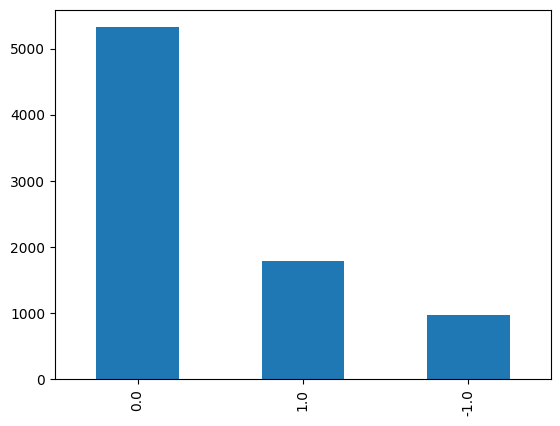

In [6]:
#레이블별 분포도 확인하기
#경찰에 대한 기사 라벨링 결과 중립>긍정>불필요>부정 순으로 많았음.
df['label'].value_counts().plot(kind='bar')

In [7]:
#총 샘플의 개수 확인
print('총 샘플의 수:',len(df))

총 샘플의 수: 8074


In [8]:
#결측값 확인
print('결측값 여부:',df.isnull().values.any())

결측값 여부: False


In [9]:
#X(뉴스 기사 내용),y 값(긍부정 레이블) 지정
X_df = df['icls_cnts']
y_df = df['label']

In [10]:
#딥러닝 모델 적용을 위해 train(학습), test(테스트) 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 0, stratify = y_df)

# 훈련 데이터 토큰화, 정수 인코딩

In [11]:
#tensorflow keras.text 의 tokenizer 모델 활용하여 훈련 데이터를 토큰화, 정수 인코딩 진행
#상위 5개 컬럼만 추출해보기
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[24835, 4061, 24836, 393, 24837, 24838, 24839, 10846, 3686, 225, 8533, 1647, 551, 125, 237, 584, 10847, 3072, 1745, 7073, 14983, 33, 405, 525, 24840, 5968, 8, 14984, 4546, 24841, 226, 1430, 14985, 84, 1, 2, 1, 7, 14986, 585, 10848, 2328, 24842, 14987, 14988, 125, 2039, 164], [3346, 24843, 14989, 10849, 14990, 1575, 444, 1198, 14991, 14992, 1932, 14993, 14994, 1, 2, 1, 14, 24844, 367, 3347, 24845, 5165, 5166, 8534, 5167, 82, 2632, 10850, 14995, 14996, 1, 2, 1, 3073, 1, 4, 1, 14997, 1, 4, 1, 4062, 14998, 10851, 3348, 646, 3349, 2632, 5969, 10], [166, 2850, 41, 28, 1, 2, 1, 65, 51, 380, 24846, 368, 24847, 10852, 1, 2, 1, 5, 231, 24848, 1576, 37, 2633, 552, 526, 982, 10853, 1577, 27, 14999, 433, 24849, 1487, 2851, 24850, 24851, 24852, 5168, 15000, 7074, 7075, 83, 209, 1, 9, 1, 2852, 5970, 18, 5971, 70, 130, 20, 3687, 7076, 15001, 2040, 1746, 714], [8, 154, 85, 338, 53, 2634, 15002, 2635, 10854, 5972, 773, 328, 24853, 24854, 15003, 24855, 24856, 15004, 7077, 1, 2, 1, 7, 340, 8, 586, 24857,

In [12]:
#각 정수가 어떤 단어에 부여되었는지 확인
word_to_index = tokenizer.word_index 
print(word_to_index)

{'b': 1, '경찰': 2, '수사': 3, '범죄': 4, '은': 5, '등': 6, '에': 7, '이': 8, '사고': 9, '있다': 10, '를': 11, '한': 12, '지난': 13, '서': 14, '밝혔다': 15, '위해': 16, '따르면': 17, '것으로': 18, '청': 19, '대한': 20, '혐의로': 21, '의': 22, '수': 23, '및': 24, '가': 25, '등을': 26, '있는': 27, '서울': 28, '서는': 29, 'a': 30, '전': 31, '는': 32, '대해': 33, '위반': 34, '예방': 35, '했다': 36, '통해': 37, '이날': 38, '위한': 39, '고': 40, '기자': 41, '집회': 42, '경찰은': 43, '함께': 44, '과': 45, '말했다': 46, '관련': 47, '로': 48, '당시': 49, '등에': 50, '코로나19': 51, '중': 52, '오후': 53, '최근': 54, '뒤': 55, '서장': 56, '받고': 57, 'a씨는': 58, '사건': 59, '조사': 60, '오전': 61, '보이스피싱': 62, '경찰에': 63, '관': 64, '청은': 65, '지난해': 66, '투기': 67, '소속': 68, '며': 69, '따라': 70, '또': 71, '을': 72, 'a씨를': 73, '신고를': 74, '자치': 75, '교통': 76, '사건을': 77, '가운데': 78, '이번': 79, '후': 80, '피해': 81, '등의': 82, '내': 83, '이후': 84, '지난달': 85, '해당': 86, '경찰이': 87, '숨진': 88, '할': 89, '지역': 90, '결과': 91, '보고': 92, '하고': 93, '조사하고': 94, '출동한': 95, '범죄수사': 96, '예정이다': 97, '“': 98, '조사를': 99, '서에': 100, '검찰에': 

# 패딩(Padding)

In [13]:
threshold = 2 #임계치
total_cnt = len(word_to_index) #단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold(임계치)보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold(임계치)보다 작은 단어의 등장 빈도수의 총 합

#단어와 빈도수의 쌍(pair)을 key와 value로 받음
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    
    #단어의 등장 빈도수 
    if(value < threshold):
        rare_cnt = rare_cnt +1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold -1, rare_cnt))
print('단어 집합에서 희귀 단어의 비율:', (rare_cnt/total_cnt)*100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율:', (rare_freq/total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 46300
단어 집합에서 희귀 단어의 비율: 65.0884246633115
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 13.07060384495949


In [14]:
#등장 빈도가 낮은 단어들을 제외하기
tokenizer = Tokenizer(num_words = total_cnt - rare_cnt +1)

In [15]:
vocab_size = len(word_to_index)+1
print('단어 집합의 크기:{}'.format((vocab_size)))

단어 집합의 크기:71135


In [16]:
print('기사의 최대 길이:%d' %max(len(sample) for sample in X_train_encoded))
print('기사의 평균 길이:%f'%(sum(map(len,X_train_encoded))/len(X_train_encoded)))

기사의 최대 길이:90
기사의 평균 길이:54.842855


In [17]:
#기사 최대 길이에 다른 데이터를 맞추어 padding
max_len = 99
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print('훈련 데이터의 크기(shape):', X_train_padded.shape)

훈련 데이터의 크기(shape): (6459, 99)


# 모델 적용

In [18]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

#임베딩 벡터의 차원을 32로 설정
embedding_dim = 32
#은닉 상태의 크기를 32로 설정
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['acc'])

#배치 크기 64, Validation_spit(검증 데이터 분리 비율)을 0.3(30%)로 설정
history = model.fit(X_train_padded, y_train, epochs = 10, batch_size = 64, validation_split = 0.3)

Epoch 1/10


2022-11-04 05:59:57.584823: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/nvidia:/usr/lib/x86_64-linux-gnu:/usr/local/cuda/lib64
2022-11-04 05:59:57.584851: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-04 05:59:57.584876: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cheetah-796f6f6e73656f393838-iw8y13-7956bf7c97-69fmk): /proc/driver/nvidia/version does not exist
2022-11-04 05:59:57.585175: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with 

71/71 [==============================] - 3s 27ms/step - loss: 0.0000e+00 - acc: 0.6359 - val_loss: 0.0000e+00 - val_acc: 0.6687
Epoch 2/10
71/71 [==============================] - 2s 25ms/step - loss: 0.0000e+00 - acc: 0.6547 - val_loss: 0.0000e+00 - val_acc: 0.6687
Epoch 3/10
71/71 [==============================] - 2s 26ms/step - loss: 0.0000e+00 - acc: 0.6547 - val_loss: 0.0000e+00 - val_acc: 0.6326
Epoch 4/10
71/71 [==============================] - 2s 26ms/step - loss: 0.0000e+00 - acc: 0.6518 - val_loss: 0.0000e+00 - val_acc: 0.6687
Epoch 5/10
71/71 [==============================] - 2s 26ms/step - loss: 0.0000e+00 - acc: 0.6530 - val_loss: 0.0000e+00 - val_acc: 0.6687
Epoch 6/10
71/71 [==============================] - 2s 26ms/step - loss: 0.0000e+00 - acc: 0.6560 - val_loss: 0.0000e+00 - val_acc: 0.6687
Epoch 7/10
71/71 [==============================] - 2s 26ms/step - loss: 0.0000e+00 - acc: 0.6554 - val_loss: 0.0000e+00 - val_acc: 0.6682
Epoch 8/10
71/71 [====================

In [20]:
#모델 평가
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print('\n 테스트 정확도:%.4f'%(model.evaluate(X_test_padded, y_test)[1]))

51/51 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - acc: 0.6588

 테스트 정확도:0.6588
